# Clase 2 - Integracion numérica y Grafico de flujos

**2do Cuatrimestre 2020**

**DF - FCEyN - UBA**

**Docentes: Gabriel Mindlin y Gonzalo Uribarri**

En este segundo notebook vamos a aprender las distintas formas de integrar numéricamente un campo vector y de que maner podemos graficar estas soluciones.

## 1) Método de Euler 2D


Supongamos que tenemos una sistema de ecuación diferenciales del tipo:

$$\dot{x} = f(x,y,t)$$
$$\dot{y} = g(x,y,t)$$

Con una condición inicial dada $({x}_{0},{y}_{0})$. 

Una integración numérica consiste en aproximar la su solución de la ecuación diferencial utilizando una discretización en la variable temporal. En el caso del método de Euler, vamos aproximarla mediante un mapa que va de $({x}_{n},{y}_{n})$ a $({x}_{n+1},{x}_{n+1})$. 

Luego, un paso de integración mediante el método de Euler 2D será:

$${x}_{n+1} = {x}_{n} + h f({x}_{n},{y}_{n},t_{n})$$
$${y}_{n+1} = {y}_{n} + h g({x}_{n},{y}_{n},t_{n})$$

#### **Ejercicio:** 
Reescriba las funciones de la integracion de Euler realizada en la práctica anterior, pero esta vez para el caso 2D. El objetivo será resolver el siguiente sistema de ecuaciones:

$$
\dot{x} = 4x+2y
$$
$$
\dot{y} = -17x-5y
$$

Luego, utilizando estas funciones:

**(a)** Analice numéricamente qué tipo de punto fijo es el origen. 

**(b)** Dibuje las trayectorias en función del tiempo (x(t) e y(t)) y en el espacio de fases. 

**(c)** Dibuje el campo vector.

In [ ]:
import numpy as np

def ecuaciones(x,y,param=[]):
    '''
    Recibe:
       x, y: Variables del sistema
       param: Lista con los parámetros del sistema
    Devuelve:
       x_dot, y_dot: valor de las derivadas para cada variable
    '''
    
    x_dot = 4*x+2*y
    y_dot = -17*x - 5*y

    return x_dot, y_dot


def integrar_ecuaciones(total_time,dt,X0,params=[]):

    '''
    Recibe:
       total_time: Tiempo total del integración
       dt: Paso temporal (h del método)
       X0: Lista con [x0,y0] valores iniciales de la integración
       params: Lista con los parámetros del sistema
    Devuelve:
       x_s, y_s: Vectores con las soluciones para ambas variables
       num_steps: Numero de pasos de integracion
    '''

    num_steps = int(np.divide(total_time,dt))

    # Empty vectors para los x(t) y y(t)
    xs = np.empty(num_steps)
    ys = np.empty(num_steps)

    # Set initial values
    xs[0], ys[0] = X0

    # Empty vectors para los dx/dt y dy/dt
    x_dot = np.empty(num_steps)
    y_dot = np.empty(num_steps)

    # Set initial derivatives values
    x_dot[0], y_dot[0] = ecuaciones(xs[0], ys[0], params)

    # Integramos con método de Euler
    for i in range(num_steps-1):
        xs[i+1] = xs[i] + dt * x_dot[i]
        ys[i+1] = ys[i] + dt * y_dot[i]

        x_dot[i+1], y_dot[i+1] = ecuaciones(xs[i+1], ys[i+1], params)

    return xs, ys, num_steps



### 1.a) Integración

In [ ]:
#Definimos el paso de integracion
dt = 0.05

#Definimos el tiempo total de integracion
total_time = 10

#Definimos la condicion inicial
X0 = (1.5,0.0)

# Integramos
x, y, num_steps = integrar_ecuaciones(total_time,dt,X0)

#Definimos el vector de tiempos y los vectores x, y que iremos llenando
t = np.arange(0, total_time, step=dt)


### 1.b) Gráfico del espacio de fases

Vamos a ver algunas funcionalidades básicas de matplotlib que nos van a ser útiles. La más común es plt.plot que nos permite hacer gráficos sencillos y aggiornarlos tanto como queramos.

Para mas informacion pueden leer el [tutorial de la documentación](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) de la libreria, o este [post muy accesible de medium](https://towardsdatascience.com/matplotlib-tutorial-learn-basics-of-pythons-powerful-plotting-library-b5d1b8f67596). 

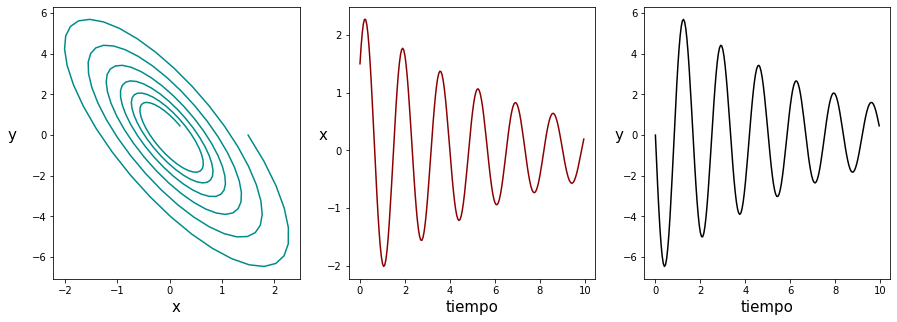

In [ ]:
import matplotlib.pyplot as plt

# Definimos la figura que contendra todos los resultados
plt.figure(figsize=(15,5))

# Definimos un primer grafico dentro de la figura
plt.subplot(131) # 1 fila, 3 columnas, primer grafico
# Ploteamos x vs y en colore darkcyan
plt.plot(x, y, 'darkcyan')
# Ponemos el nombre a los ejes
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15, rotation=0, labelpad=20)

# Repetimos para un segundo gráfico
plt.subplot(132) # 1 fila, 3 columnas, segundo grafico
plt.plot(t, x, 'darkred')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("x", rotation=0, fontsize=15)

# Repetimos para un tercer gráfico
plt.subplot(133) # 1 fila, 3 columnas, tercer grafico
plt.plot(t, y, 'k')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("y", rotation=0, fontsize=15)

plt.show()

### 1.c) Gráfico del campo vector

Primero armamos una grilla de puntos sobre los que calcularemos el campo vector. La grilla la armamos con [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html). 

Para graficar las flechas una opción es usar [quiver](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.quiver.html) de matplotlib. Como siempre, pueden explorar qué parámetros hay para hacerlo más bonito.

In [ ]:
#Damos la grilla de puntos sobre la que miraremos el campo vector

x_grilla, y_grilla= np.meshgrid(np.linspace(-2, 2, 20),np.linspace(-6, 6, 24))

dx_grilla, dy_grilla = ecuaciones(x_grilla,y_grilla)

print(np.shape(dx_grilla)) #Para ver cuantas filas y columnas
print(dx_grilla[0][:]) #Miramos la primera fila, todas las columnas

(24, 20)
[-20.         -19.15789474 -18.31578947 -17.47368421 -16.63157895
 -15.78947368 -14.94736842 -14.10526316 -13.26315789 -12.42105263
 -11.57894737 -10.73684211  -9.89473684  -9.05263158  -8.21052632
  -7.36842105  -6.52631579  -5.68421053  -4.84210526  -4.        ]


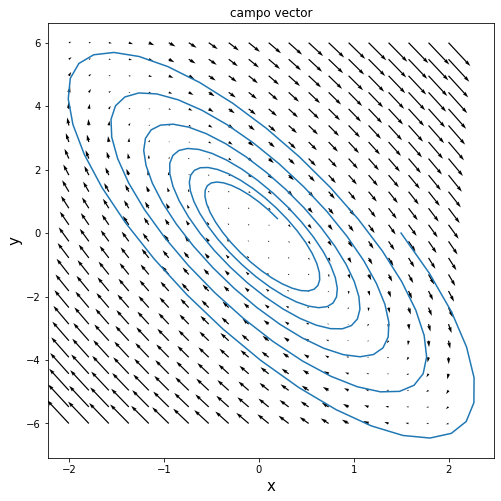

In [ ]:
#Ahora las graficamos; usamos quiver de matplotlib -> chusmear la documentacion
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("campo vector")
ax.quiver(x_grilla, y_grilla, dx_grilla, dy_grilla, color='k', angles='xy')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.plot(x, y)
plt.show()

**El origen es un atractor**


**Ejercicio extra:**
Cambie la función `ecuaciones()` y realice el nuevamente el mismo analisis para el siguiente campo vector:

$$
\dot{x} = 5x+2y
$$
$$
\dot{y} = -17x-5y
$$

Qué tipo de punto fijo es el origen? Cómo da la integración numérica?

In [ ]:
def ecuaciones(x,y,param=[]):
    '''
    Recibe:
       x, y: Variables del sistema
       param: Lista con los parámetros del sistema
    Devuelve:
       x_dot, y_dot: valor de las derivadas para cada variable
    '''
    
    x_dot = 5*x+2*y
    y_dot = -17*x - 5*y
    return x_dot, y_dot

In [ ]:
#integracion
#Definimos el paso de integracion
dt = 0.05

#Definimos el tiempo total de integracion
total_time = 10

#Definimos la condicion inicial
X0 = (1.5,0.0)

# Integramos
x, y, num_steps = integrar_ecuaciones(total_time,dt,X0)

#Definimos el vector de tiempos y los vectores x, y que iremos llenando
t = np.arange(0, total_time, step=dt)

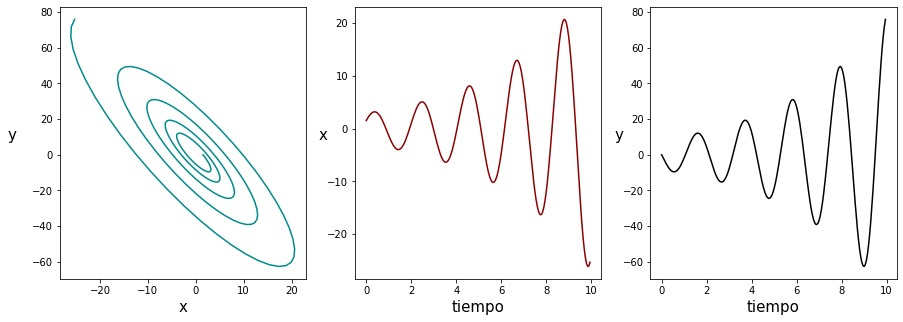

In [ ]:
# Definimos la figura que contendra todos los resultados
plt.figure(figsize=(15,5))

# Definimos un primer grafico dentro de la figura
plt.subplot(131) # 1 fila, 3 columnas, primer grafico
# Ploteamos x vs y en colore darkcyan
plt.plot(x, y, 'darkcyan')
# Ponemos el nombre a los ejes
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15, rotation=0, labelpad=20)

# Repetimos para un segundo gráfico
plt.subplot(132) # 1 fila, 3 columnas, segundo grafico
plt.plot(t, x, 'darkred')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("x", rotation=0, fontsize=15)

# Repetimos para un tercer gráfico
plt.subplot(133) # 1 fila, 3 columnas, tercer grafico
plt.plot(t, y, 'k')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("y", rotation=0, fontsize=15)

plt.show()

In [ ]:
#CAMPO VECTOR (ESPACIO DE FASES)
#Damos la grilla de puntos sobre la que miraremos el campo vector

x_grilla, y_grilla= np.meshgrid(np.linspace(-4, 4, 20),np.linspace(-12, 12, 24))

dx_grilla, dy_grilla = ecuaciones(x_grilla,y_grilla)

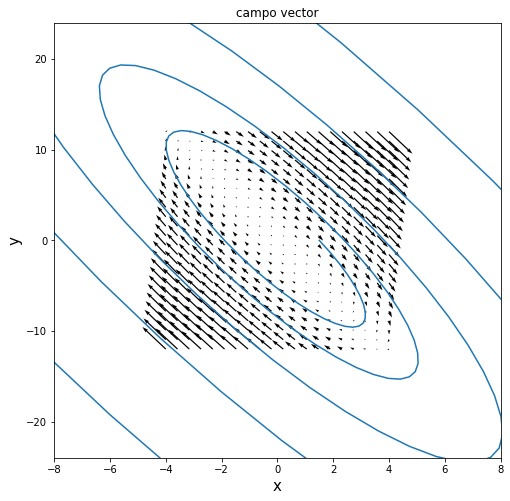

In [ ]:
#Ahora las graficamos; usamos quiver de matplotlib -> chusmear la documentacion
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("campo vector")
ax.quiver(x_grilla, y_grilla, dx_grilla, dy_grilla, color='k', angles='xy')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.plot(x, y)
plt.xlim((-8,8))
plt.ylim((-24,24))
plt.show()

**El origen es un expulsor (lo contrario a atractor)**





In [ ]:
# otro ejemplo
import numpy as np

def ecuaciones(x,y,param=[]):
    '''
    Recibe:
       x, y: Variables del sistema
       param: Lista con los parámetros del sistema
    Devuelve:
       x_dot, y_dot: valor de las derivadas para cada variable
    '''
    
    x_dot = x-y
    y_dot = x**2 - 4

    return x_dot, y_dot


def integrar_ecuaciones(total_time,dt,X0,params=[]):

    '''
    Recibe:
       total_time: Tiempo total del integración
       dt: Paso temporal (h del método)
       X0: Lista con [x0,y0] valores iniciales de la integración
       params: Lista con los parámetros del sistema
    Devuelve:
       x_s, y_s: Vectores con las soluciones para ambas variables
       num_steps: Numero de pasos de integracion
    '''

    num_steps = int(np.divide(total_time,dt))

    # Empty vectors para los x(t) y y(t)
    xs = np.empty(num_steps)
    ys = np.empty(num_steps)

    # Set initial values
    xs[0], ys[0] = X0

    # Empty vectors para los dx/dt y dy/dt
    x_dot = np.empty(num_steps)
    y_dot = np.empty(num_steps)

    # Set initial derivatives values
    x_dot[0], y_dot[0] = ecuaciones(xs[0], ys[0], params)

    # Integramos con método de Euler
    for i in range(num_steps-1):
        xs[i+1] = xs[i] + dt * x_dot[i]
        ys[i+1] = ys[i] + dt * y_dot[i]

        x_dot[i+1], y_dot[i+1] = ecuaciones(xs[i+1], ys[i+1], params)

    return xs, ys, num_steps

(-30.0, 30.0)

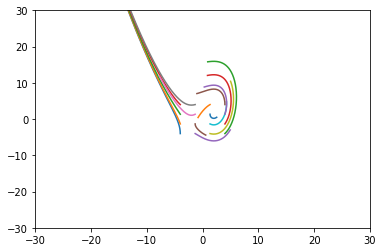

In [ ]:



dt = 0.001
total_time = 1
t = np.arange(0, total_time, dt)
plt.figure()
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)

for xi in Xi:
    for yi in Yi:
        # Definimos la condicion inicial
        X0=(xi, yi)
        # Integramos
        xt, yt, num_steps = integrar_ecuaciones(total_time,dt,X0)

        # Ploteamos las soluciones
        plt.plot(xt, yt)
plt.xlim(-30, 30)
plt.ylim(-30, 30)

## 2) Odeint

Hay diversos métodos, más o menos precisos y que funcionan para diversos sistemas. Scipy trae un integrador bastante bueno llamado ["odeint"](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) (no teman a la documentación).

El odeint necesita que le digamos como calcular la derivada en cada punto (tenemos que darle el campo vector), las condiciones iniciales y los tiempos donde queremos que integre.

### 2.a) Odeint 1D

Tomemos como ejemplo la ecuación:

$$ \dot{x} = -x^{2} + 4 $$ 

Este sistema tiene sus puntos fijos en x=-2 (inestable) y x=+2 (estable). 

In [ ]:
def dxdt(x, t):
    return -x**2 + 4

El odeint se invoca de la siguiente forma:


```
odeint(campo vector, condiciones iniciales, vector de tiempos)
```


Donde el primer argumento es el campo vector (definido de la forma que lo hicimos arriba), el segundo es la condición inicial (o una lista con las condiciones iniciales de cada variable) y el tercero es una lista de tiempos donde queremos que nos de el resultado de la integración.

In [ ]:
from scipy.integrate import odeint

dt = 0.1
t = np.arange(0, 5, step=dt)
x0 = 10
solucion = odeint(dxdt, x0, t)  #odeint hace algo y su output lo guardamos en la variable "solucion"

In [ ]:
len(t)

50

Veamos la forma de lo que nos devuelve el odeint:

In [ ]:
print(solucion.shape)
x = solucion[:, 0]
print(x)

(50, 1)
[10.          5.23170416  3.71063606  3.00498074  2.62212756  2.39668427
  2.25748693  2.16901186  2.11173555  2.07421511  2.04944543  2.03300974
  2.02206706  2.01476514  2.00988534  2.00662095  2.00443573  2.00297228
  2.00199189  2.00133498  2.00089477  2.00059973  2.00040199  2.00026945
  2.00018062  2.00012107  2.00008116  2.0000544   2.00003647  2.00002444
  2.00001638  2.00001098  2.00000736  2.00000493  2.0000033   2.00000221
  2.00000149  2.000001    2.00000067  2.00000045  2.0000003   2.0000002
  2.00000013  2.00000009  2.00000006  2.00000004  2.00000003  2.00000002
  2.00000001  2.00000001]


Grafiquemos la solución:

Text(0, 0.5, 'x')

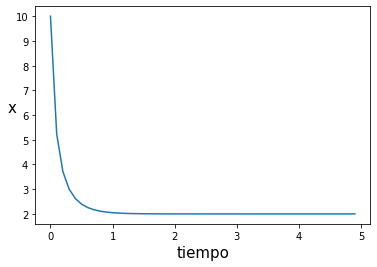

In [ ]:
plt.plot(t, x)
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("x", rotation=0, fontsize=15)

**La condicion inicial esta en x0=10 y a medida que pasa el tiempo converge al punto fijo estable x=2**

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Text(0, 0.5, 'x')

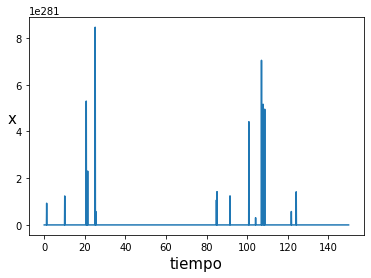

In [ ]:
# aca le cambie la condicion inicial a x0=-10 y se rompe
dt = 0.1
t = np.arange(0, 150, step=dt)
x0 = -10
solucion = odeint(dxdt, x0, t)  #odeint hace algo y su output lo guardamos en la variable "solucion"
x = solucion[:, 0]
plt.plot(t, x)
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("x", rotation=0, fontsize=15)

**Ojo con el dt**

Atención! Para odeint, el vector de tiempos solo le dice en qué momentos queremos que devuelva el resultado de la integración. El paso temporal real lo va a ir ajustando sin avisarnos!

Para convencernos comparemos 2 integraciones con tiempos muy distintos:

Text(0, 0.5, 'x')

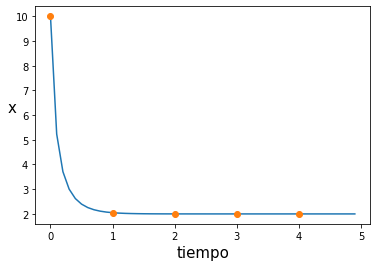

In [ ]:
# Graficamos la solución que teníamos de antes, con paso temporal "chico"
plt.plot(t, x)
# Hacemos otra integración con paso temporal "grande"
dt = 1
t2 = np.arange(0, 5, step=dt)
x0 = 10
sol2 = odeint(dxdt, x0, t2)
x2 = sol2[:, 0]
plt.plot(t2, x2, 'o')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("x", rotation=0, fontsize=15)

### 2.b) Ecuaciones con parámetros - Ejemplo Sigmoide

Una de las cosas que nos suele interesar es analizar como cambian los flujos cuando cambiamos algún parámetro. Para eso está bueno tener una función definida y pasarle el parámetro que queremos ir moviendo como un argumento al odeint. Esto se puede hacer con el odeint, agregando un argumento (una tupla) cuando lo llamamos:



```
x = odeint(campo_vector, xi, t, args=(parametro1, parametro2))
```


Para que esto funcione, nuestro campo vector tiene que saber como tomar esos parámetros! Por eso tenemos que definirlo con:


```
def campo_vector(x, t, parametro1, parametro2)
```


Veamos el ejemplo de la tasa de disparo en una neurona, donde el campo vector se definía como:

$$
\dot{x} = -x+\dfrac{1}{1+e^{-(r+cx)}}
$$
con (r, c) dos parámetros que vamos a ir variando.

Text(0, 0.5, 'x')

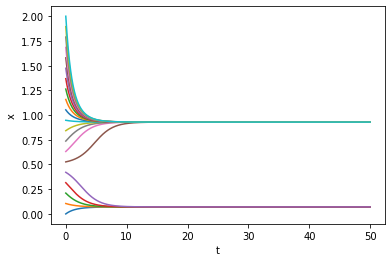

In [ ]:
# Definimos el campo vector, con los dos parámetros r y c
def campo_vector(x, t, r, c):
    dxdt = -x + 1 / (1 + np.e**(-(r+c*x)))
    return dxdt

# Definimos tiempo máximo, paso y un vector de tiempos
tmax = 50.
dt = 1./100
t = np.arange(0, tmax, dt)

# Le damos algún valor a los dos parámetros
r = -3
c = 6

# Nos preparamos varias condiciones iniciales
Xi = np.linspace(0, 2, 20)
for xi in Xi:
    # Para cada una de las condiciones iniciales hacemos la integración
    x = odeint(campo_vector, xi, t, args=(r, c))
    # Ploteamos. Python automáticamente va a ir cambiando el color en cada vuelta
    plt.plot(t, x)
    #plt.plot(t, x, label=xi)
plt.xlabel('t')
plt.ylabel('x')
#plt.legend()



Dependiendo la condicion incial el sistema converge al punto fijo x=0 o x=1

Ahora para un valor fijo de condición inicial, vemos qué pasa si cambiamos el valor de uno de los parámetros

Text(0, 0.5, 'x')

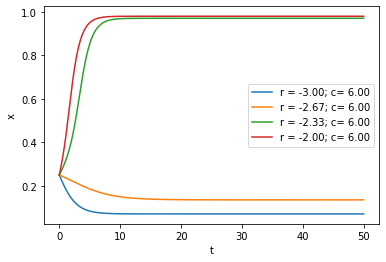

In [ ]:
# Nos armamos una lista de valores para r
rs = np.linspace(-3, -2, 4)
# Ponemos un única condición inicial
xi = 0.25
for r in rs:
    # Para cada valor del parámetro hacemos la integración
    x = odeint(campo_vector, xi, t, args=(r, c))
    # Graficamos y le ponemos una etiqueta a cada curva para reconocerlas
    plt.plot(t, x, label=r'r = {:.2f}; c= {:.2f}'.format(r, c))
# Le pedimos que nos muestre las etiquetas que generamos
plt.legend()
plt.xlabel('t')
plt.ylabel('x')

Vemos que hay 3 puntos fijos (el rojo/verde, el naranja y el azul). Ahora probemos con otros rs y otra condicion inicial.




Text(0, 0.5, 'x')

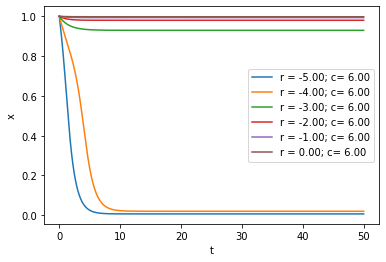

In [ ]:
# probemos con otros rs y otra condicion inicial
# Nos armamos una lista de valores para r
rs = np.arange(-5, 1, 1)
# Ponemos un única condición inicial
xi = 1
for r in rs:
    # Para cada valor del parámetro hacemos la integración
    x = odeint(campo_vector, xi, t, args=(r, c))
    # Graficamos y le ponemos una etiqueta a cada curva para reconocerlas
    plt.plot(t, x, label=r'r = {:.2f}; c= {:.2f}'.format(r, c))
# Le pedimos que nos muestre las etiquetas que generamos
plt.legend()
plt.xlabel('t')
plt.ylabel('x')

Con esta otra eleccion hay dos puntos fijos

### 2.c) Odeint caso 2D
En 2 (o más) dimensiones funciona muy parecido. Solo nos tenemos que ocupar de escribir correctamente el campo vector para que el primer argumento sea una lista que va a contener en cada elemento una variable distinta, desempaquetarlo y devolver un array de derivadas.

```
def campo_vector(variables, t):
    var1 = variables[0]
    var2 = variables[1]
    ...
    dvar1 = ...
    dvar2 = ...
    ...
    return [dvar1, dvar2, ...]
```

Veamoslo con el siguiente problema:

$$
\dot{x} = 4x+2y\\
\dot{y} = -17x-5y
$$

Recordemos que este sistema tenia un atractor en el origen (lo vimos con Euler)

In [ ]:
def campo_vector(z, t):
    # Como ahora las variables vienen en una lista (en el primer argumento: z)
    # primero las separamos para que sea más claro
    x = z[0]
    y = z[1]
    # Y ahora calculamos las derivadas
    dxdt = 4*x+2*y
    dydt = -17*x-5*y
    return [dxdt, dydt]

# funciona si le agrego un parametro a 
#def campo_vector(z, t, a):
    # Como ahora las variables vienen en una lista (en el primer argumento: z)
    # primero las separamos para que sea más claro
#    x = z[0]
#    y = z[1]
    # Y ahora calculamos las derivadas
#    dxdt = 4*x + 2*y + a
#    dydt = -17*x - 5*y
#    return [dxdt, dydt]

[[ 1.00000000e-02  0.00000000e+00]
 [ 1.00399099e-02 -1.69914326e-04]
 [ 1.00796394e-02 -3.39656489e-04]
 ...
 [ 6.35455004e-06  1.82042740e-04]
 [ 6.74380586e-06  1.81023764e-04]
 [ 7.13257799e-06  1.80003275e-04]]


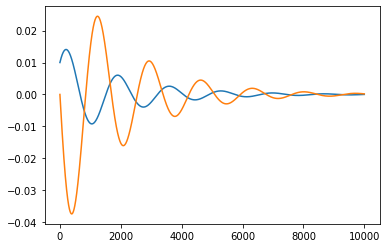

In [ ]:
dt = 0.001
t = np.arange(0, 10, dt)
# Ponemos condiciones iniciales
xi = 0.01
yi = 0
# Y nos armamos una lista que contiene ci de cada variable
zi = [xi, yi]
# Llamamos al odeint y vean que le pasamos la lista de condiciones iniciales!
sol = odeint(campo_vector, zi, t)
# Vean como nos viene la solución:
plt.plot(sol)
print(sol)

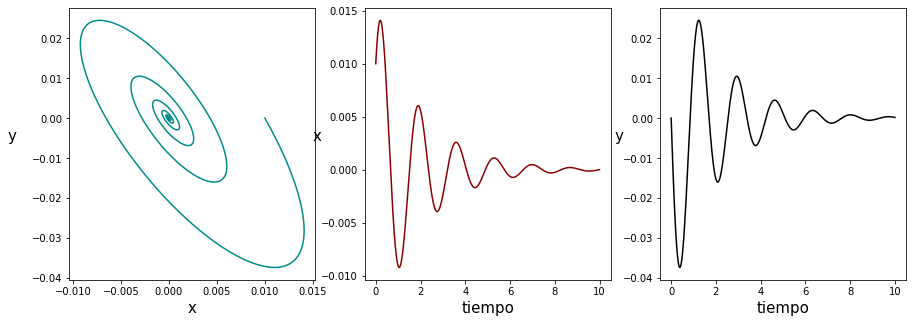

In [ ]:
# Cada elemento que nos devuelve es un par de coordenadas [x, y]
# Para recuperar las x por un lado y las y por el otro:
xt = sol[:, 0]
yt = sol[:, 1]

# Definimos la figura que contendra todos los resultados
plt.figure(figsize=(15,5))

# Definimos un primer grafico dentro de la figura
plt.subplot(131) # 1 fila, 3 columnas, primer grafico
# Ploteamos x vs y en colore darkcyan
plt.plot(xt, yt, 'darkcyan')
# Ponemos el nombre a los ejes
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15, rotation=0, labelpad=20)

# Repetimos para un segundo gráfico
plt.subplot(132) # 1 fila, 3 columnas, segundo grafico
plt.plot(t, xt, 'darkred')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("x", rotation=0, fontsize=15)

# Repetimos para un tercer gráfico
plt.subplot(133) # 1 fila, 3 columnas, tercer grafico
plt.plot(t, yt, 'k')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("y", rotation=0, fontsize=15)

plt.show()



Recuperamos el atractor en el origen con odeint2D (ya lo habiamos visto con Euler). Ahora **probar odeint 2D con el expulsor**.

In [ ]:
def campo_vector(z, t):
    # Como ahora las variables vienen en una lista (en el primer argumento: z)
    # primero las separamos para que sea más claro
    x = z[0]
    y = z[1]
    # Y ahora calculamos las derivadas
    dxdt = 5*x+2*y
    dydt = -17*x-5*y
    return [dxdt, dydt]
#da una orbita periodica
#dt = 0.05
#t = np.arange(0, 10, dt)
# Ponemos condiciones iniciales
#xi = 1.5
#yi = 0

dt = 0.05
t = np.arange(0, 100, dt)
# Ponemos condiciones iniciales
xi = 15
yi = -1000


# Y nos armamos una lista que contiene ci de cada variable
zi = [xi, yi]
# Llamamos al odeint y vean que le pasamos la lista de condiciones iniciales!
sol = odeint(campo_vector, zi, t)


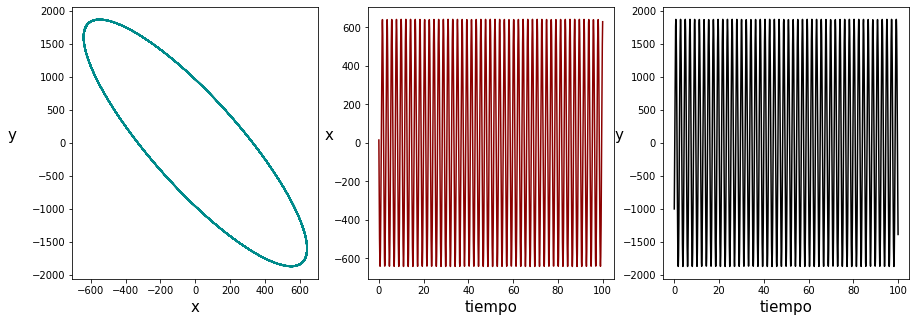

In [ ]:
# Cada elemento que nos devuelve es un par de coordenadas [x, y]
# Para recuperar las x por un lado y las y por el otro:
xt = sol[:, 0]
yt = sol[:, 1]

# Definimos la figura que contendra todos los resultados
plt.figure(figsize=(15,5))

# Definimos un primer grafico dentro de la figura
plt.subplot(131) # 1 fila, 3 columnas, primer grafico
# Ploteamos x vs y en colore darkcyan
plt.plot(xt, yt, 'darkcyan')
# Ponemos el nombre a los ejes
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15, rotation=0, labelpad=20)

# Repetimos para un segundo gráfico
plt.subplot(132) # 1 fila, 3 columnas, segundo grafico
plt.plot(t, xt, 'darkred')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("x", rotation=0, fontsize=15)

# Repetimos para un tercer gráfico
plt.subplot(133) # 1 fila, 3 columnas, tercer grafico
plt.plot(t, yt, 'k')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("y", rotation=0, fontsize=15)

plt.show()

Esto esta mal. Me da una orbita periodica con odeint2D cuando me deberia dar un expulsor (dio bien con Euler). 

## 3) Método de [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

El integrador odeint puede llegar a tener problemas, ya que internamente cambia entre métodos para resolver la ecuación entre pasos temporales y a la vez va ajustando el paso (aunque solo nos diga la solución en los tiempos que se la pedimos) para tener el error acotado. Vean el siguiente ejemplo, con un campo vector bien inocente:

<Figure size 432x288 with 0 Axes>

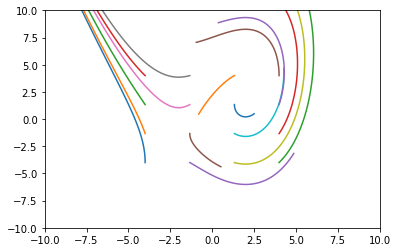

In [ ]:
import numpy as np
from scipy.integrate import odeint, ode
import matplotlib.pyplot as plt

# Sistema de ecuaciones
def f(t, z):
    x = z[0]
    y = z[1]
    dxdt = x-y
    dydt = x**2-4
    return [dxdt, dydt]

# Integracion odeint
dt = 0.01
tmax = 1
t = np.arange(0, tmax, dt)
plt.figure()
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
plt.figure()
for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        sol_fut = odeint(f, zi, t, tfirst=True)
        xt = sol_fut[:, 0]
        yt = sol_fut[:, 1]
        plt.plot(xt, yt)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

En estos casos podemos usar otra estrategia en la que fijamos el método de integración. En vez de odeint vamos a usar un método bastante estandar, llamado [Runge-Kutta 4](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta)

RK4 es el caballito de batalla de los integradores numéricos, pero, como todo, tiene sus ventajas y desventajas, y va a funcionar mejor o peor según el sistema.

Lo bueno de este método es que pueden escribirlo ustedes mismos y no hay nada de caja negra! Para simplificar les vamos a proporcionar una versión que se adapta bastante bien si vienen de odeint.

Esta función ejecuta la integración de un paso temporal. Los argumentos que requiere son: i) campo vector (**función**) ii) valor de las variables en el tiempo t, iii) paso temporal

Los últimos dos (*args, **kwargs) son para que, en caso de que sus campos vectores tengan argumentos, se los puedan pasar a la función y los sepa manejar (más, adelante)

In [ ]:
import numpy as np
from scipy.integrate import odeint, ode
import matplotlib.pyplot as plt
def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

Usemos el rk4 para el caso 2D y comparemos con odeint. Noten que el integrador nuevamente requiere que le pasemos el punto donde estamos como una lista y nos devuelve el x e y siguientes.

La forma de utilizarlo sería:

`x[i+1], y[i+1] = rk4(campo_vector, [x[i], y[i]], tt, dt)`

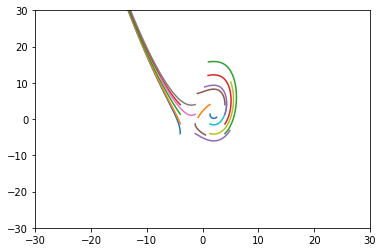

In [ ]:
# Integracion Runge-Kutta 4
# Sistema de ecuaciones
def f(z,t):
    x = z[0]
    y = z[1]
    dxdt = x-y
    dydt = x**2-4
    return [dxdt, dydt]

dt = 0.01
tmax = 1
t = np.arange(0, tmax, dt)
plt.figure()
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)

for xi in Xi:
    for yi in Yi:
        
        # Definimos los vectores vacios
        xt = np.zeros_like(t)
        yt = np.zeros_like(t)

        # Definimos la condicion inicial
        xt[0], yt[0] = xi, yi

        for i in range(len(t)-1):
          # COMPLETAR
          xt[i+1], yt[i+1] = rk4(f, [xt[i], yt[i]], t[i], dt)
          
        # Ploteamos las soluciones
        plt.plot(xt, yt)
    plt.ylim((-30,30))
    plt.xlim((-30,30))

**Ejercicio - Bifurcación de Bogdanov-Takens:**

1) Modifique el la función `integrar_ecuaciones()` para reemplazar el metodo de runge kutta en lugar del de Euler. 

2) Luego utilize esta funación y los métodos para graficar aprendidos para estudiar numéricamente la forma normal de la [bifurcación de Bogdanov-Takens](http://www.scholarpedia.org/article/Bogdanov-Takens_bifurcation), dada por las ecuaciones:

$$
\dot{x} = y\\
\dot{y} = a+bx+x^2-xy
$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def ecuaciones(z, t, *args, **kwargs):
    '''
    Recibe:
       z: Variables del sistema [x,y]

    Devuelve:
       x_dot, y_dot: valor de las derivadas para cada variable
    '''
    x = z[0]
    y = z[1]
    a=args[0]
    b=args[-1]
    # Y ahora calculamos las derivadas
    dxdt = y
    dydt = a + b*x +  x**2 - x*y
    return [dxdt, dydt]

def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

def integrar_ecuaciones(total_time,dt,X0,Y0,*args):

    '''
    Recibe:
       total_time: Tiempo total del integración
       dt: Paso temporal (h del método)
       X0: Lista con [x0,y0] valores iniciales de la integración
       params: Lista con los parámetros del sistema
    Devuelve:
       x_s, y_s: Vectores con las soluciones para ambas variables
       num_steps: Numero de pasos de integracion
    '''


    t = np.arange(0, total_time, dt)
    # Empty vectors para los x(t) y y(t)
    xt = np.zeros_like(t)
    yt = np.zeros_like(t)

    # Set initial values
    xt[0] = X0
    yt[0]=Y0
    for i in range(len(t)-1):
      # COMPLETAR
      xt[i+1], yt[i+1] = rk4(ecuaciones, [xt[i], yt[i]], t[i], dt, *args)
    return xt, yt , t


  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

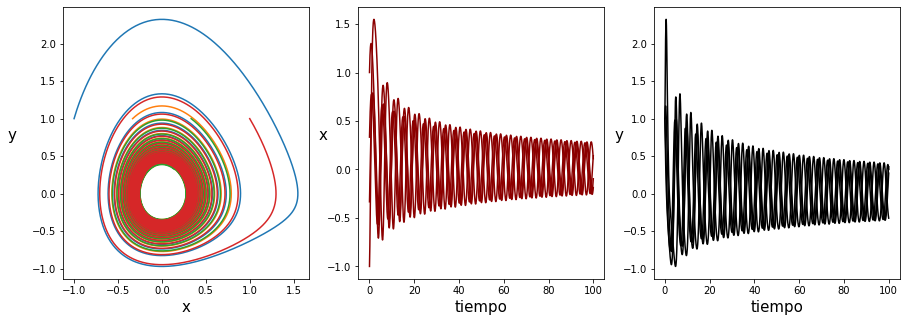

In [12]:
dt = 0.01
total_time = 10
plt.figure(figsize=(15,5))
Xi = np.linspace(-1, 1, 4)
Yi = np.linspace(-1, 1, 4)

for xi in Xi:
    for yi in Yi:
      #  xs, ys, t = integrar_ecuaciones(total_time, dt, xi, yi,2**2/4,-2)
      #  xs, ys, t = integrar_ecuaciones(total_time, dt, xi, yi,2**2/4,2)
        xs, ys, t = integrar_ecuaciones(total_time, dt, xi, yi,0,-2) # ciclo limite 
      
        # Ploteamos las soluciones
    #plt.plot(xs, ys)
    #plt.plot(t, xs)
    # Definimos un primer grafico dentro de la figura
    plt.subplot(131) # 1 fila, 3 columnas, primer grafico
    # Ploteamos x vs y en colore darkcyan
    #plt.plot(xs, ys, 'darkcyan')
    plt.plot(xs, ys)
    # Ponemos el nombre a los ejes
    plt.xlabel("x", fontsize=15)
    plt.ylabel("y", fontsize=15, rotation=0, labelpad=20)
    #plt.show()
    # Repetimos para un segundo gráfico
    plt.subplot(132) # 1 fila, 3 columnas, segundo grafico
    plt.plot(t, xs, 'darkred')
    plt.xlabel("tiempo", fontsize=15)
    plt.ylabel("x", rotation=0, fontsize=15)
    #plt.show()
    # Repetimos para un tercer gráfico
    plt.subplot(133) # 1 fila, 3 columnas, tercer grafico
    plt.plot(t, ys, 'k')
    plt.xlabel("tiempo", fontsize=15)
    plt.ylabel("y", rotation=0, fontsize=15)
    #plt.show()
#plt.ylim((-30,30))
#plt.xlim((-30,30))








## 4) Extra: Para visualizar el flujo rápido!
Una función **muy** útil para tener una buena idea de como es el flujo es [*streamplot*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.streamplot.html#matplotlib.axes.Axes.streamplot). Lo que hace es integrar durante un tiempo corto en una grilla de puntos.

Para hacerlo andar, necesitamos calcular cuanto vale el campo vector en cada punto de la grilla. Primero nos definimos una grilla usando la función [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [3]:
# Definimos una grilla de puntos
XX, YY = np.meshgrid(np.arange(-100, 100, .1), np.arange(-100, 100, .1))

print(XX)
print(np.shape(XX))

[[-100.   -99.9  -99.8 ...   99.7   99.8   99.9]
 [-100.   -99.9  -99.8 ...   99.7   99.8   99.9]
 [-100.   -99.9  -99.8 ...   99.7   99.8   99.9]
 ...
 [-100.   -99.9  -99.8 ...   99.7   99.8   99.9]
 [-100.   -99.9  -99.8 ...   99.7   99.8   99.9]
 [-100.   -99.9  -99.8 ...   99.7   99.8   99.9]]
(2000, 2000)


Ahora podemos usar el campo vector para calcular las derivadas en cada uno de estos puntos. La sintaxis para hacer esto (y que los argumentos sean potables para el streamplot) es la siguiente:

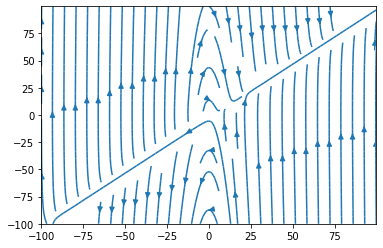

In [6]:
# Calculamos el campo vector en cada punto
def campo_vector(z,t):
    x = z[0]
    y = z[1]
    dxdt = x-y
    dydt = x**2-4
    return [dxdt, dydt]
def ecuaciones(z, t, *args, **kwargs):
    '''
    Recibe:
       z: Variables del sistema [x,y]

    Devuelve:
       x_dot, y_dot: valor de las derivadas para cada variable
    '''
    x = z[0]
    y = z[1]
    a=0
    b=-2
    # Y ahora calculamos las derivadas
    dxdt = y
    dydt = a + b*x +  x**2 - x*y
    return [dxdt, dydt]
#DX, DY = campo_vector([XX, YY], 0)
DX, DY = ecuaciones([XX, YY], 0)
#DX, DY = ecuaciones([XX, YY], 0)

#Y finalmente graficamos
plt.streamplot(XX, YY, DX, DY, density=1, minlength=.1)